In [1]:
import tensorflow as tf          #ml open source framework  
import numpy as np               #to perform math opns. on large data and store in array
import matplotlib.pyplot as plt  #plotting library
import math                      #python's math lib

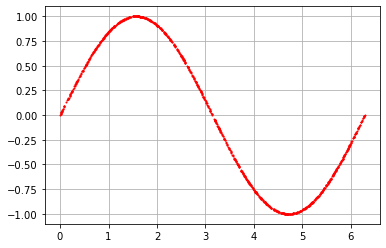

In [2]:
#data for model that can take a value, x, and predict its sine, y.
Seed=12
np.random.seed(Seed)
tf.random.set_seed(Seed)
samples=1000
x_values=np.random.uniform(low=0,high=2*math.pi,size=samples)
np.random.shuffle(x_values)
y_values=np.sin(x_values)
plt.plot(x_values,y_values,'r.',markersize=2)
plt.grid(True)
plt.show()

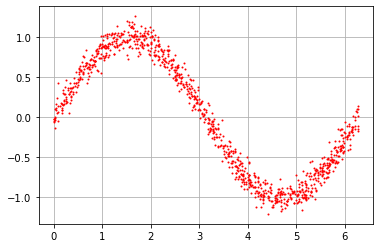

In [3]:
#adding noise to more closely resemble real world data
y_values+=0.1*np.random.randn(*y_values.shape)
plt.plot(x_values,y_values,'r.',markersize=2)
plt.grid(True)
plt.show()

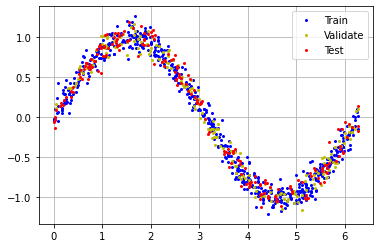

In [4]:
#splitting the data
train_split=int(0.6*samples)
test_split=int(0.2*samples+train_split)
x_train,x_validate,x_test=np.split(x_values,[train_split,test_split])
y_train,y_validate,y_test=np.split(y_values,[train_split,test_split])

assert(x_train.size+x_validate.size+x_test.size)==samples
plt.plot(x_train,y_train,'b.',markersize=4,label="Train")
plt.plot(x_validate,y_validate,'y.',markersize=4,label="Validate")
plt.plot(x_test,y_test,'r.',markersize=4,label="Test")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
#to predict numeric value, use regression, make simple two layer neural networks
from tensorflow.keras import layers
model_1=tf.keras.Sequential()
model_1.add(layers.Dense(16,activation="relu",input_shape=(1,))) #relu=rectified linear unit
model_1.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history_1=model_1.fit(x_train,y_train,epochs=50,batch_size=16,validation_data=(x_validate,y_validate))

Epoch 1/50
38/38 [==============================] - 2s 16ms/step - loss: 0.4857 - mae: 0.5682 - val_loss: 0.3878 - val_mae: 0.5232
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 0.3549 - mae: 0.5064 - val_loss: 0.3454 - val_mae: 0.4979
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.3231 - mae: 0.4860 - val_loss: 0.3156 - val_mae: 0.4754
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.2959 - mae: 0.4668 - val_loss: 0.2940 - val_mae: 0.4581
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.2723 - mae: 0.4490 - val_loss: 0.2601 - val_mae: 0.4336
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 0.2501 - mae: 0.4315 - val_loss: 0.2375 - val_mae: 0.4151
Epoch 7/50
38/38 [==============================] - 0s 4ms/step - loss: 0.2322 - mae: 0.4184 - val_loss: 0.2171 - val_mae: 0.3991
Epoch 8/50
38/38 [==============================] - 0s 6ms/step - loss: 0.2166 - mae: 0.4

19/19 [==============================] - 0s 3ms/step


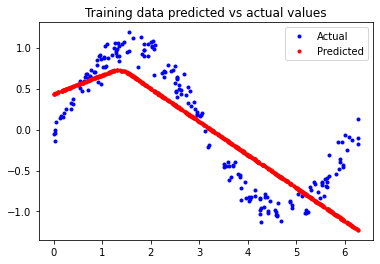

In [7]:
 predictions = model_1.predict(x_train)
 # Plot the predictions along with the test data
 plt.clf()
 plt.title('Training data predicted vs actual values')
 plt.plot(x_test, y_test, 'b.', label='Actual')
 plt.plot(x_train, predictions, 'r.', label='Predicted')
 plt.legend()
 plt.show()

In [8]:
 model_2 = tf.keras.Sequential()
 # First layer takes a scalar input and feeds it through 16 "neurons." The
 # neurons decide whether to activate based on the 'relu' activation function.
 model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
 # The new second layer may help the network learn more complex representations
 model_2.add(layers.Dense(16, activation='relu'))
 # Final layer is a single neuron, since we want to output a single value
 model_2.add(layers.Dense(1))
 # Compile the model using a standard optimizer and loss function for regression
 model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 # Show a summary of the model
 model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
 history_2 = model_2.fit(x_train, y_train, epochs=400, batch_size=16,validation_data=(x_validate, y_validate))

Epoch 1/400
38/38 [==============================] - 1s 10ms/step - loss: 0.3738 - mae: 0.5224 - val_loss: 0.3432 - val_mae: 0.4946
Epoch 2/400
38/38 [==============================] - 0s 4ms/step - loss: 0.3064 - mae: 0.4744 - val_loss: 0.2815 - val_mae: 0.4517
Epoch 3/400
38/38 [==============================] - 0s 4ms/step - loss: 0.2568 - mae: 0.4374 - val_loss: 0.2461 - val_mae: 0.4199
Epoch 4/400
38/38 [==============================] - 0s 5ms/step - loss: 0.2207 - mae: 0.4084 - val_loss: 0.2167 - val_mae: 0.3932
Epoch 5/400
38/38 [==============================] - 0s 5ms/step - loss: 0.2014 - mae: 0.3912 - val_loss: 0.1876 - val_mae: 0.3680
Epoch 6/400
38/38 [==============================] - 0s 4ms/step - loss: 0.1851 - mae: 0.3736 - val_loss: 0.1772 - val_mae: 0.3553
Epoch 7/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1750 - mae: 0.3616 - val_loss: 0.1602 - val_mae: 0.3403
Epoch 8/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1701 - 

38/38 [==============================] - 0s 4ms/step - loss: 0.1571 - mae: 0.3159 - val_loss: 0.1539 - val_mae: 0.3059
Epoch 64/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1573 - mae: 0.3159 - val_loss: 0.1507 - val_mae: 0.3042
Epoch 65/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1548 - mae: 0.3125 - val_loss: 0.1530 - val_mae: 0.3055
Epoch 66/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1576 - mae: 0.3155 - val_loss: 0.1488 - val_mae: 0.3027
Epoch 67/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1558 - mae: 0.3142 - val_loss: 0.1552 - val_mae: 0.3062
Epoch 68/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1556 - mae: 0.3127 - val_loss: 0.1785 - val_mae: 0.3183
Epoch 69/400
38/38 [==============================] - 0s 5ms/step - loss: 0.1587 - mae: 0.3179 - val_loss: 0.1548 - val_mae: 0.3058
Epoch 70/400
38/38 [==============================] - 0s 4ms/step - loss: 0.1573 - mae: 0

Epoch 125/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0270 - mae: 0.1244 - val_loss: 0.0239 - val_mae: 0.1228
Epoch 126/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0236 - mae: 0.1192 - val_loss: 0.0272 - val_mae: 0.1306
Epoch 127/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0231 - mae: 0.1177 - val_loss: 0.0264 - val_mae: 0.1293
Epoch 128/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0218 - mae: 0.1146 - val_loss: 0.0274 - val_mae: 0.1178
Epoch 129/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0203 - mae: 0.1104 - val_loss: 0.0198 - val_mae: 0.1075
Epoch 130/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0189 - mae: 0.1085 - val_loss: 0.0176 - val_mae: 0.1074
Epoch 131/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0183 - mae: 0.1035 - val_loss: 0.0153 - val_mae: 0.0969
Epoch 132/400
38/38 [==============================] - 0s 5ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 0.0120 - mae: 0.0871 - val_loss: 0.0089 - val_mae: 0.0784
Epoch 187/400
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0856 - val_loss: 0.0237 - val_mae: 0.1214
Epoch 188/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0120 - mae: 0.0858 - val_loss: 0.0101 - val_mae: 0.0830
Epoch 189/400
38/38 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.0862 - val_loss: 0.0092 - val_mae: 0.0764
Epoch 190/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0113 - mae: 0.0847 - val_loss: 0.0098 - val_mae: 0.0810
Epoch 191/400
38/38 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0856 - val_loss: 0.0101 - val_mae: 0.0802
Epoch 192/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0124 - mae: 0.0866 - val_loss: 0.0087 - val_mae: 0.0774
Epoch 193/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0124 -

Epoch 248/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0122 - mae: 0.0856 - val_loss: 0.0108 - val_mae: 0.0826
Epoch 249/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0113 - mae: 0.0845 - val_loss: 0.0091 - val_mae: 0.0771
Epoch 250/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0108 - mae: 0.0830 - val_loss: 0.0105 - val_mae: 0.0827
Epoch 251/400
38/38 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.0849 - val_loss: 0.0104 - val_mae: 0.0817
Epoch 252/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0114 - mae: 0.0840 - val_loss: 0.0091 - val_mae: 0.0760
Epoch 253/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0852 - val_loss: 0.0094 - val_mae: 0.0768
Epoch 254/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0115 - mae: 0.0855 - val_loss: 0.0100 - val_mae: 0.0787
Epoch 255/400
38/38 [==============================] - 0s 4ms/step - 

38/38 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0838 - val_loss: 0.0091 - val_mae: 0.0790
Epoch 310/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0111 - mae: 0.0834 - val_loss: 0.0129 - val_mae: 0.0893
Epoch 311/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0110 - mae: 0.0836 - val_loss: 0.0093 - val_mae: 0.0763
Epoch 312/400
38/38 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.0857 - val_loss: 0.0122 - val_mae: 0.0885
Epoch 313/400
38/38 [==============================] - 0s 4ms/step - loss: 0.0113 - mae: 0.0844 - val_loss: 0.0102 - val_mae: 0.0810
Epoch 314/400
38/38 [==============================] - 0s 3ms/step - loss: 0.0109 - mae: 0.0826 - val_loss: 0.0134 - val_mae: 0.0937
Epoch 315/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0114 - mae: 0.0851 - val_loss: 0.0116 - val_mae: 0.0859
Epoch 316/400
38/38 [==============================] - 0s 4ms/step - loss: 0.0114 -

Epoch 371/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0113 - mae: 0.0839 - val_loss: 0.0088 - val_mae: 0.0783
Epoch 372/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0110 - mae: 0.0832 - val_loss: 0.0102 - val_mae: 0.0803
Epoch 373/400
38/38 [==============================] - 0s 6ms/step - loss: 0.0109 - mae: 0.0837 - val_loss: 0.0083 - val_mae: 0.0751
Epoch 374/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0110 - mae: 0.0844 - val_loss: 0.0087 - val_mae: 0.0753
Epoch 375/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0845 - val_loss: 0.0120 - val_mae: 0.0872
Epoch 376/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0113 - mae: 0.0839 - val_loss: 0.0109 - val_mae: 0.0836
Epoch 377/400
38/38 [==============================] - 0s 5ms/step - loss: 0.0110 - mae: 0.0834 - val_loss: 0.0148 - val_mae: 0.0967
Epoch 378/400
38/38 [==============================] - 0s 5ms/step - 

7/7 [==============================] - 0s 2ms/step


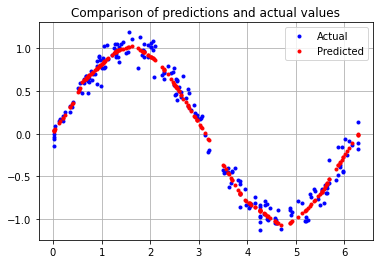

In [10]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.grid()
plt.legend()
plt.show()
